## physics4481-7681/cs4812 ps7 problem 1

### due Wed 8 Dec 23:00 via gradescope

This is the first problem of ps7 -- the remaining problems are (or will be) posted in [ps7.pdf](https://courses.cit.cornell.edu/physics4481-7681_2021fa/ps7.pdf).

### The problem of errors

In this problem, we will explore some of the ideas that you have been studying regarding error correction.

*Important:* As always, please explain your answers. Don't just write a number with no explanation. When writing equations, use $\LaTeX$ in markdown cells.

*Also important:* Throughout, we will assume that the only gates that we are allowed are two-qubit CNOT gates and arbitrary single-qubit gates.

Look at the layout of the retired device, `ibmq_tokyo`, which you can find in Figure 2 of [arXiv:1903.10963](https://arxiv.org/pdf/1903.10963.pdf). Our error correction scheme will be specifically tailored to the layout of this device.

### Part a
Consider the 5-qubit code from Slide 11 of [Lecture 22](https://courses.cit.cornell.edu/physics4481-7681_2021fa/lec22_wb.pdf). In order to protect the logical qubit, we would need to measure the four stabilizer operators $M_0, \ldots, M_3$.

i) circuit diagram that used for measuring one of the Mi:

Please note that the above four are the ancilla qubits (initialized with hadamard gate), and the bottomn five are the data qubits in the entanhgled state |psi>_L, (I can't find a good way to draw an box including the five qubits). Inside each barrier, the gates consist each the stabilizer operator Mi, and we measure the ancilla respectively for each stabilizer measurement


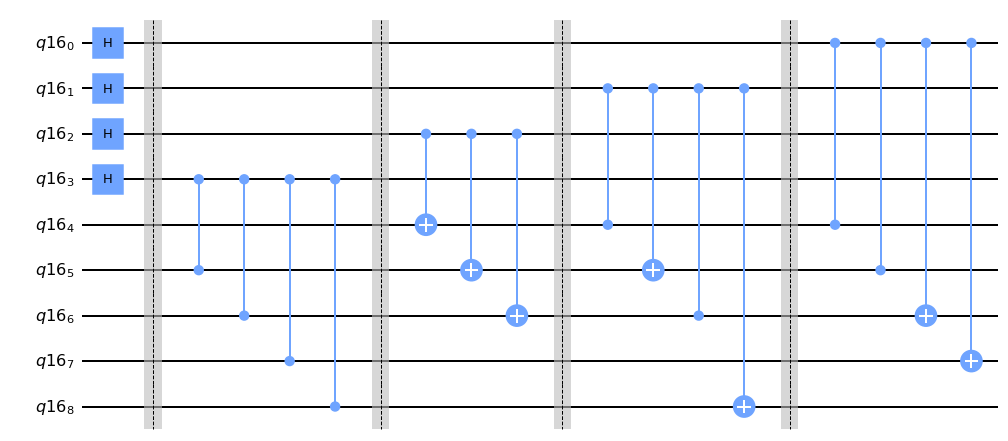

In [18]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
n = 9  # number of qubits
q = QuantumRegister(9)


circuit = QuantumCircuit(q)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])

circuit.barrier()
circuit.cz(q[3], q[5])
circuit.cz(q[3], q[6])
circuit.cz(q[3], q[7])
circuit.cz(q[3], q[8])


circuit.barrier()
circuit.cx(q[2], q[4])
circuit.cx(q[2], q[5])
circuit.cx(q[2], q[6])

circuit.barrier()
circuit.cz(q[1], q[4])
circuit.cx(q[1], q[5])
circuit.cz(q[1], q[6])
circuit.cx(q[1], q[8])

circuit.barrier()
circuit.cz(q[0], q[4])
circuit.cz(q[0], q[5])
circuit.cx(q[0], q[6])
circuit.cx(q[0], q[7])

circuit.draw()



(ii) How many qubits, in total, are needed to implement the 5-qubit code?

9 qubits in total are needed to implement the 5- qubit code: 5 Qbits and 4 ancillas. Please see the circuit digram for the 5 Qbit error correction code as shown below:


(iii) Is it possible to map these qubits to qubits on `ibmq_tokyo` so that all of the stabilizers can be measured using only four CNOT gates per stabilizer (i.e. no SWAP gates)? If yes, what is the mapping? If no, why not?

No, because we cannot find a square on the 20 qubit processor device that connects the measurement qubit surrounding the data qubit. Observe that on the qunatum device 'ibmq_tokyo', (2, 7), (12, 17) are disconned from each other, then we could not have valid logical operators for one of the vertical/horizontal line.

(iv) Now consider the 7-qubit code from [Lecture 23](https://courses.cit.cornell.edu/physics4481-7681_2021fa/lec23_wb.pdf). How many qubits, in total, are needed to implement this code?

For the 7 qubit code, we need 13 qubits in total: 7 qubits and 6 ancillas in this case. As shown in the circuit diagram below:



(v) Is it possible to implement the 7-qubit code on `ibmq_tokyo` with only four CNOTs per stabilizer? As always, justify your answer.

No, there is not enough connection to make between circuits due to the (2, 7) and (12, 17) qubit disconnection. 


### Part b

Now, let's consider the following unrealistic error model. Suppose that we want to construct an $n$-qubit code (i.e. encode a logical qubit in $n$ code qubits) in which errors can occur on two of the code qubits and the rest of the qubits are ideal. Further, we allow for simultaneous errors on the two noisy qubits. That is, we want to be able to identify and correct 16 types of errors, corresponding to $\mathbb{I}$, $X$, $Z$, and $XZ$ on each of two imperfect qubits.

(i) How many stabilizer operators do we need to measure in order to detect all of these errors? (As always, explain your work; don't just write the answer.)

(ii) What is the minimal number of code qubits that we can use? That is, how many qubits do we need so that the all-plus eigenspace of the stabilizer operators is two-dimensional?

(iii) Calling the two noisy qubits $a$ and $b$ and the remaining perfect qubits $0$, $1$, $\ldots$, write down stabilizer operators that let you identify the errors.

(iv) Identify two orthogonal states that span the all-plus eigenspace of the stabilizer operators. These (or linear combinations of them) are the logical qubit states $|0\rangle$ and $|1\rangle$.

(i) How many stabilizer operators do we need to measure in order to detect all of these errors? (As always, explain your work; don't just write the answer.)

Since we have two noisy qubits (with potentially simultaneous errors), then in addition to the two X and Z ancilla qubit, we need to be able to detect simultaneous erors on the two noisy qubits using two additional stabilizer to detect whether there is a simultaneous error occured. Therefore in total we need four stabilizer operators to measure all the errors. 

(ii) What is the minimal number of code qubits that we can use? That is, how many qubits do we need so that the all-plus eigenspace of the stabilizer operators is two-dimensional?

Since the all plus eigenspace of the stabilizer operators is two dimesional, and we have four stabilizer operators with only one logical qubit required, then the minimal number of code qubits will be the 
n = (1 + 4) *2 = 5 * 2 = 10


(iii) Calling the two noisy qubits $a$ and $b$ and the remaining perfect qubits $0$, $1$, $\ldots$, write down stabilizer operators that let you identify the errors.

There are four stabilizer operators are: M1 = X1X2XaXb, M2 = XaX3, M3 = Z3Z4ZaZb, M4 = ZbZ2. Any single error on either of the noisy qubit will be identified by M1 and M3. If there are simultaneous double errors,M1 and M3 will not be able to detect them, but we can rule out the errors with results from M2 and M4.

(iv) Identify two orthogonal states that span the all-plus eigenspace of the stabilizer operators. These (or linear combinations of them) are the logical qubit states $|0\rangle$ and $|1\rangle$.


|0>L = (1+M1)(1+M2)(1+M3)(1+M4)|000000> = (1 + X1X2XaXb)(1 + XaX3)(1 + Z3Z4ZaZb)(1 + ZbZ2)|000000>

|1>L = X_L|0>L

### Part c

(i) Now, let's consider the device `ibmq_tokyo`. Place your code qubits on the device so that the stabilizers can be measured without using any additional SWAP gates (i.e. to measure each stabilizer operator, you are allowed a number of CNOTs equal to the number of qubits on which the stabilizer acts). There are multiple ways to do this. If you are having trouble with the stabilizers that you chose in Part b, you can choose different stabilizers. Hint: the simplest solution may seem like cheating, but that is a result of the somewhat contrived nature of this problem.

(ii) Write a circuit that prepares the logical $|0\rangle$ state and doesn't use any gates between non-connected qubits.

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
n = 6  # number of qubits
q = QuantumRegister(n)


circuit = QuantumCircuit(q)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])

circuit.barrier()
circuit.cz(q[3], q[5])
circuit.cz(q[3], q[6])
circuit.cz(q[3], q[7])
circuit.cz(q[3], q[8])


circuit.barrier()
circuit.cx(q[2], q[4])
circuit.cx(q[2], q[5])
circuit.cx(q[2], q[6])

circuit.barrier()
circuit.cz(q[1], q[4])
circuit.cx(q[1], q[5])
circuit.cz(q[1], q[6])
circuit.cx(q[1], q[8])

circuit.barrier()
circuit.cz(q[0], q[4])
circuit.cz(q[0], q[5])
circuit.cx(q[0], q[6])
circuit.cx(q[0], q[7])

circuit.draw()




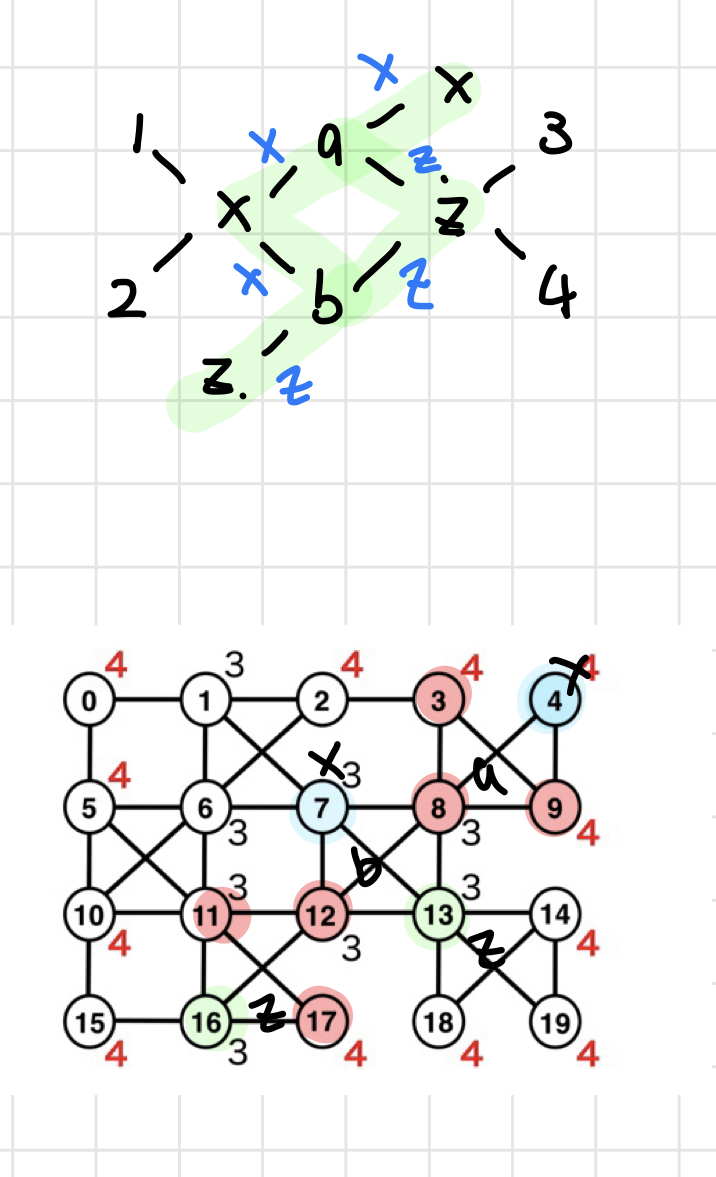

(i) Now, let's consider the device `ibmq_tokyo`. Place your code qubits on the device so that the stabilizers can be measured without using any additional SWAP gates (i.e. to measure each stabilizer operator, you are allowed a number of CNOTs equal to the number of qubits on which the stabilizer acts). There are multiple ways to do this. If you are having trouble with the stabilizers that you chose in Part b, you can choose different stabilizers. Hint: the simplest solution may seem like cheating, but that is a result of the somewhat contrived nature of this problem.

Please see the graph above.